In [64]:
import numpy as np
from keras.datasets import cifar10  # ラベル付けされた5万枚の訓練画像と1万枚のテスト画像のデータセットが入ってます。

from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D

from keras.models import Sequential
#from keras.layers.convolutional import Conv2D
#from keras.layers.pooling import MaxPool2D
#from keras.layers.core import Dense,Activation,Dropout,Flatten
#from keras.datasets import cifar10
from keras.utils import np_utils

👆ニューラルネットワークの層を作るため、必要な関数を取り込んでおきます。

In [65]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

👆cifar10から画像を取り入れます。下記の正解レベルがあります。
0-airplane 1-automobile 2-bird 3-cat 4-deer 5-dog 6-frog 7-horse 8-ship 9-ship
(x_train: 訓練画像, y_train: x_trainに対応する答え, x_test: テスト画像, y_test: x_testに対応する答え)

In [71]:
import matplotlib.pyplot as plt  # 画像を描画するツール
%matplotlib inline

👆このエディタ(jupyter notebook)に表示させるためのコマンドです。

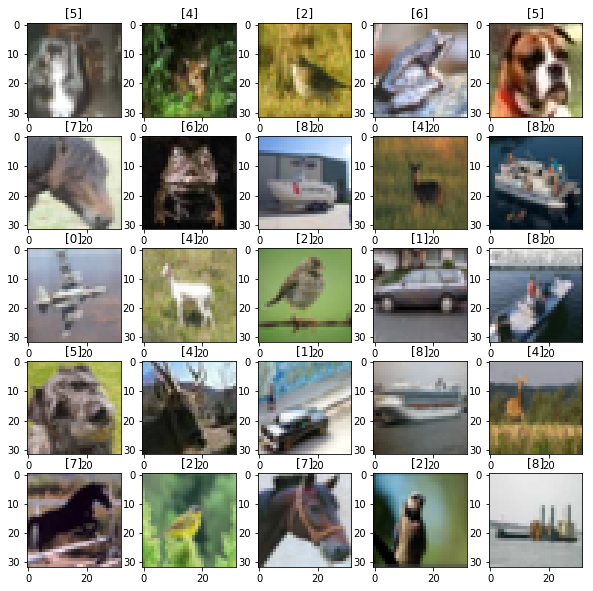

In [72]:
#5x5枚の画像を表示する
plt.figure(figsize=(10,10))
for i in range(25):
    rand_num=np.random.randint(0,50000)
    cifar_img=plt.subplot(5,5,i+1)
    plt.imshow(x_train[rand_num])
    #x軸の目盛りを消す
    #plt.tick_params(labelbottom='off')
    #y軸の目盛りを消す
    #plt.tick_params(labelleft='off')
    #正解ラベルを表示
    plt.title(y_train[rand_num])
plt.show()

5万枚の訓練データの中からランダムに25枚選び表示してみました。

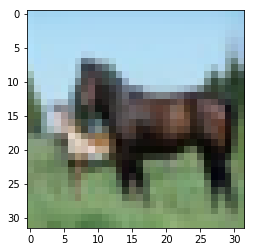

In [73]:
plt.imshow(x_train[12])

訓練データ12番目の画像はこんな感じです。

In [74]:
y_train[12]  # 1枚目を表示してみる

array([7], dtype=uint8)

訓練データの12番目の答えはこんな情報でした。7のhorseのようです。

In [75]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

縦横32x32、0-255のRGBなので255で割って0-1で正規化します。（精度を上げるため。）

In [76]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

👆正解ラベルをOne-Hot表現（１次元の行列）に変換しておきます。

In [77]:
print(x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 10)


訓練データの情報を表示してみました。50000万枚の縦×横が (32,32) の画像です。対応する答えも50000個で、10種類す。

In [78]:
y_train[7]  # 1枚目を表示してみる

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

訓練データの答えを見てみると、こんな情報でした。「7」のhorseになってます。

In [79]:
input_shape = (32, 32, 3)
num_classes = 10

👆入れるデータは32×32、3チャンネルの情報として、答えは0-9の10種類（クラス）と設定します。

In [80]:
x_in = Input(shape=input_shape, name='input')
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(x_in)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
prediction = Dense(num_classes, activation='softmax', name='prediction')(x)
model = Model(x_in, prediction)
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

👆答えの予測方法を設定します。（前回のCNN同様、２段階のフィルタと情報選択をして答えを決めることにします。）

In [81]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               147584    
__________

今の設定を表示しておきました。

In [61]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 19s 383us/step - loss: 1.5772 - acc: 0.4321 - val_loss: 1.3555 - val_acc: 0.5254
Epoch 2/10
50000/50000 [==============================] - 18s 353us/step - loss: 1.2582 - acc: 0.5558 - val_loss: 1.2155 - val_acc: 0.5665
Epoch 3/10
50000/50000 [==============================] - 18s 364us/step - loss: 1.1267 - acc: 0.6009 - val_loss: 1.1096 - val_acc: 0.6126
Epoch 4/10
50000/50000 [==============================] - 20s 394us/step - loss: 1.0293 - acc: 0.6410 - val_loss: 1.0542 - val_acc: 0.6347
Epoch 5/10
50000/50000 [==============================] - 20s 404us/step - loss: 0.9683 - acc: 0.6647 - val_loss: 1.0086 - val_acc: 0.6499
Epoch 6/10
50000/50000 [==============================] - 21s 420us/step - loss: 0.9059 - acc: 0.6841 - val_loss: 0.9669 - val_acc: 0.6637
Epoch 7/10
50000/50000 [==============================] - 21s 428us/step - loss: 0.8580 - acc: 0.7001 - val_loss: 0.

👆「50000個の教師データで学び、10000個のデータから128個選んでテストしてみる」という学習を10回繰り返します。毎回、正解率（Accuracy)と不正解率（Loss)を表示しています。（「正確さ（Accuracy）」が１に近づくように、学習していきます。）

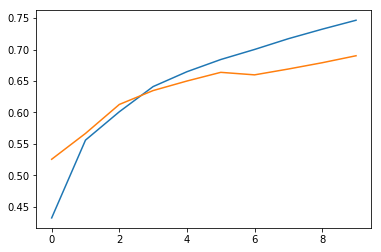

In [62]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

学習の成果を表示しました。オレンジは教師データでの学習結果、青はテストの結果です。学習するに従って正確に手書きの文字を認識できるようになっています。